Problem Statement:

An analysis of Amazon sales to understand customer preferences , market reach and product demand

The main objective of this analysis is to gain actionable insights into Amazon sales performance by answering key questions like :

Who are the primary buyers?

What products are being purchased most frequently?

What is the shipping status for the majority of orders?

Which product category is most popular?

Are all size available for all category?

From which locations are we receiving the highest number of orders?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Amazon Sale Report.csv")
df

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128971,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,False,NaN,NaN,NaN
128972,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,...,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,False,NaN,NaN,NaN
128973,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Blazzer,XXL,Shipped,...,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,False,NaN,NaN,NaN
128974,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,...,INR,1199.00,Halol,Gujarat,389350.0,IN,False,NaN,NaN,NaN


In [3]:
df.shape

(128976, 21)

In [4]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
128971    False
128972    False
128973    False
128974    False
128975    False
Length: 128976, dtype: bool

In [5]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [6]:
df.tail()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
128971,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,517.0,HYDERABAD,TELANGANA,500013.0,IN,False,NaN,NaN,NaN
128972,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,...,INR,999.0,GURUGRAM,HARYANA,122004.0,IN,False,NaN,NaN,NaN
128973,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Blazzer,XXL,Shipped,...,INR,690.0,HYDERABAD,TELANGANA,500049.0,IN,False,NaN,NaN,NaN
128974,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,...,INR,1199.0,Halol,Gujarat,389350.0,IN,False,NaN,NaN,NaN
128975,128974,408-7436540-8728312,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,S,Shipped,...,INR,696.0,Raipur,CHHATTISGARH,492014.0,IN,False,NaN,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [8]:
df.isnull().sum()

index                      0
Order ID                   0
Date                       0
Status                     0
Fulfilment                 0
Sales Channel              0
ship-service-level         0
Category                   0
Size                       0
Courier Status             0
Qty                        0
currency                7800
Amount                  7800
ship-city                 35
ship-state                35
ship-postal-code          35
ship-country              35
B2B                        0
fulfilled-by           89713
New                   128976
PendingS              128976
dtype: int64

In [9]:
df.drop(columns=['fulfilled-by'], inplace=True)
df.drop(columns=['New'], inplace=True)
df.drop(columns=['PendingS'], inplace=True)
df.drop(columns=['currency'], inplace=True)
df.drop(columns=['Amount'], inplace=True)
df.drop(columns=['ship-city'], inplace=True)
df.drop(columns=['ship-postal-code'], inplace=True)
df.drop(columns=['ship-country'], inplace=True)

In [10]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,ship-state,B2B
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,MAHARASHTRA,False
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,KARNATAKA,False
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,MAHARASHTRA,True
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,PUDUCHERRY,False
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,TAMIL NADU,False


In [11]:
df.dropna(subset=['ship-state' ], inplace=True)

# Check if rows are dropped
print("Remaining null values:\n", df.isnull().sum())
print("Updated DataFrame shape:", df.shape)

Remaining null values:
 index                 0
Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Category              0
Size                  0
Courier Status        0
Qty                   0
ship-state            0
B2B                   0
dtype: int64
Updated DataFrame shape: (128941, 13)


In [12]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'ship-state', 'B2B'],
      dtype='object')

In [13]:
df['Date']=pd.to_datetime (df['Date'])

In [14]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'ship-state', 'B2B'],
      dtype='object')

In [15]:
#rename Columns
df.rename(columns={'Qty':'Quantity'})

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Quantity,ship-state,B2B
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,MAHARASHTRA,False
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,KARNATAKA,False
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,MAHARASHTRA,True
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,PUDUCHERRY,False
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,TAMIL NADU,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
128971,128970,406-6001380-7673107,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,TELANGANA,False
128972,128971,402-9551604-7544318,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,1,HARYANA,False
128973,128972,407-9547469-3152358,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,Blazzer,XXL,Shipped,1,TELANGANA,False
128974,128973,402-6184140-0545956,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,1,Gujarat,False


In [16]:
df.describe()

,index,Date,Qty
count,128941.000000,128941,128941.000000
mean,64487.286340,2022-05-12 11:51:10.306574336,0.904414
min,0.000000,2022-03-31 00:00:00,0.000000
25%,32247.000000,2022-04-20 00:00:00,1.000000
50%,64486.000000,2022-05-10 00:00:00,1.000000
75%,96731.000000,2022-06-04 00:00:00,1.000000
max,128974.000000,2022-06-29 00:00:00,15.000000
std,37231.274722,NaN,0.313356


In [17]:
df.describe(include='object')

,Order ID,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,ship-state
count,128941,128941,128941,128941,128941,128941,128941,128941,128941
unique,120201,13,2,2,2,9,11,4,69
top,171-5057375-2831560,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,MAHARASHTRA
freq,12,77797,89691,128817,88608,50280,22366,109458,22272


In [18]:
#use describe() for specific columns
df[['Qty']].describe()

,Qty
count,128941.000000
mean,0.904414
std,0.313356
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,15.000000


In [19]:
df.shape

(128941, 13)

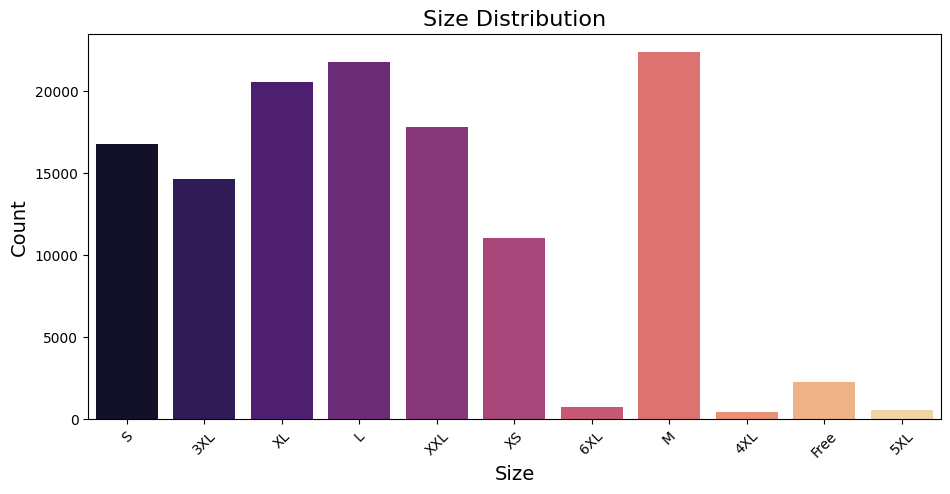

In [20]:
# ax=sns.countplot(x='Size' ,data=df)

plt.figure(figsize=(11, 5))

colors = sns.color_palette("magma", n_colors=len(df['Size'].unique()))

ax = sns.countplot(x='Size', data=df, palette=colors)

plt.title("Size Distribution", fontsize=16)
plt.xlabel("Size", fontsize=14)
plt.ylabel("Count", fontsize=14)

plt.xticks(rotation=45)

plt.show()


In [21]:
# Group By
#### The groupby() function in pandas is used to group data based on one or more columns in a DataFrame

df.groupby(['Size'], as_index=False)['Qty'].sum().sort_values(by='Qty',ascending=False)

,Size,Qty
6,M,20133
5,L,19695
8,XL,18633
10,XXL,16243
7,S,15037
0,3XL,13359
9,XS,9849
4,Free,2070
3,6XL,688
2,5XL,513


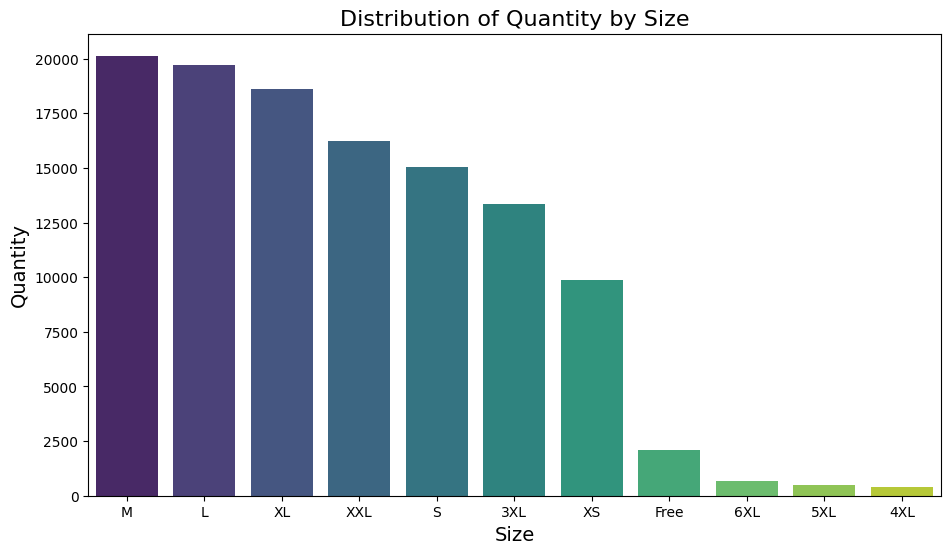

In [22]:
#which size people are buying most

# Group and sort the data
S_Qty = df.groupby(['Size'], as_index=False)['Qty'].sum().sort_values(by='Qty', ascending=False)

plt.figure(figsize=(11, 6))

sns.barplot(x='Size', y='Qty', data=S_Qty, palette='viridis')

plt.title("Distribution of Quantity by Size", fontsize=16)
plt.xlabel("Size", fontsize=14)
plt.ylabel("Quantity", fontsize=14)

plt.show()


Observation : From the above graph, you can see that the majority of the quantity sold belongs to M-size, making it the most preferred size among buyers. 

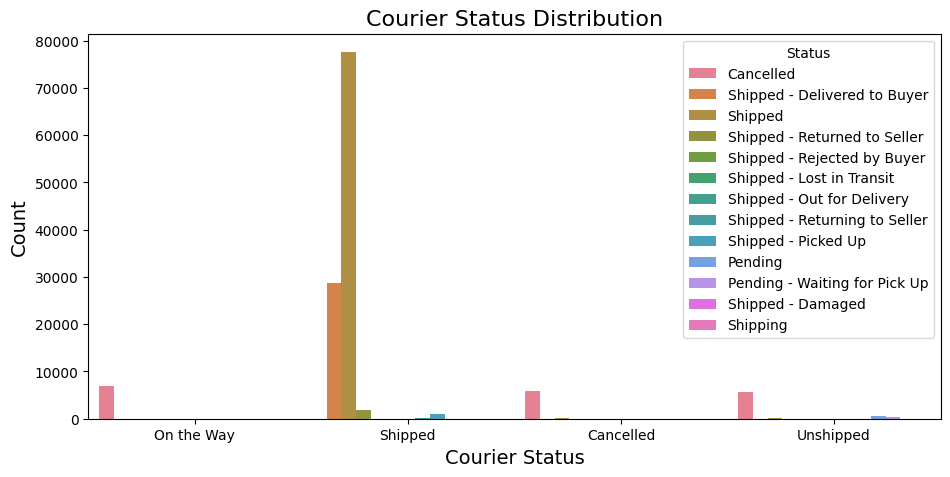

In [23]:
#courier status
#shipping state of orders

plt.figure(figsize=(11, 5))

sns.countplot(data=df, x='Courier Status', hue='Status', width=0.9)  # Default is 0.8, adjust for thicker bars

plt.title("Courier Status Distribution", fontsize=16)
plt.xlabel("Courier Status", fontsize=14)
plt.ylabel("Count", fontsize=14)

plt.show()




Observation : From above Graph the majority of the orders are shipped through the courier.



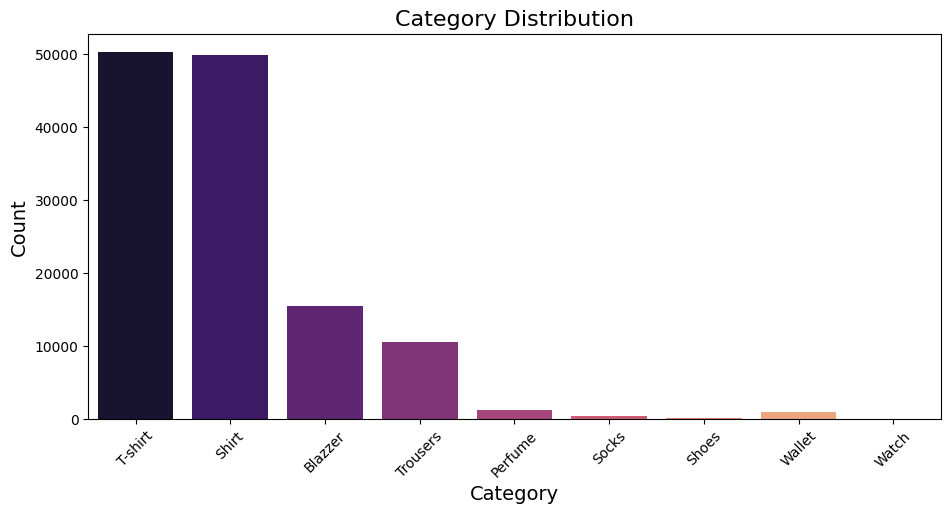

In [24]:
#which category people buying most

# Convert Category to string (already done)
df['Category'] = df['Category'].astype(str)

plt.figure(figsize=(11, 5))

colors = sns.color_palette("magma", n_colors=len(df['Category'].unique()))

sns.countplot(x=df['Category'], palette=colors)

plt.title("Category Distribution", fontsize=16)
plt.xlabel("Category", fontsize=14)
plt.ylabel("Count", fontsize=14)

plt.xticks(rotation=45)

plt.show()


Observation : From the above graph, you can see that most of the buyers prefer T-shirts, making it the most popular clothing category. After T-shirts, the next preferred category is Shirts, indicating that these two items have the highest demand among buyers. 

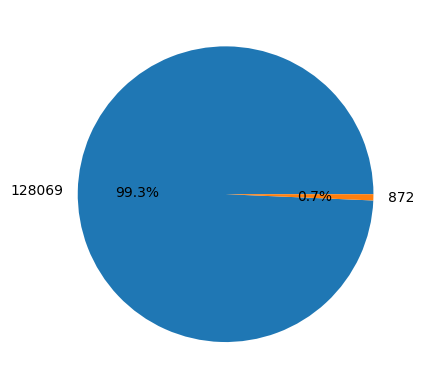

In [25]:
# Checking B2B Data  by using pie chart 
B2B_Check = df['B2B'].value_counts()

#  Plot the pie chart
plt.pie(B2B_Check, labels=B2B_Check, autopct='%1.1f%%')
#plt.axis('equal')
plt.show()

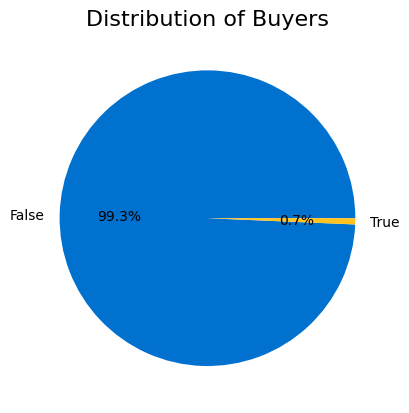

In [26]:
#who are our buyers

# Assuming df['B2B'] is already available
B2B_Check = df['B2B'].value_counts()

colors = ["#0071ce", "#ffc220"]  

plt.pie(B2B_Check, labels=B2B_Check.index, autopct='%1.1f%%', colors=colors[:len(B2B_Check)])

plt.title("Distribution of Buyers", fontsize=16)

plt.show()


Observation : From above chart we can see that maximum i.e. 99.3% of buyers are retailers and 0.7% are B2B buyers .

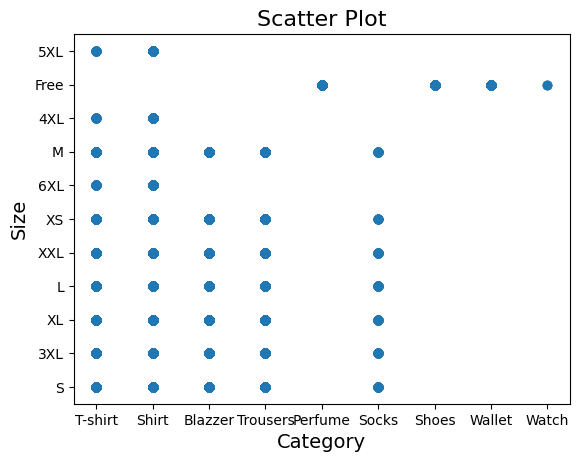

In [27]:
#Are all sizes available for all category

# Assuming df['Category'] and df['Size'] are available
x_data = df['Category']
y_data = df['Size']

plt.scatter(x_data, y_data)

plt.xlabel('Category', fontsize=14)  
plt.ylabel('Size', fontsize=14)

plt.title('Scatter Plot', fontsize=16)

plt.show()

Observation : From the above graph, you can see that some sizes are missing for certain categories.

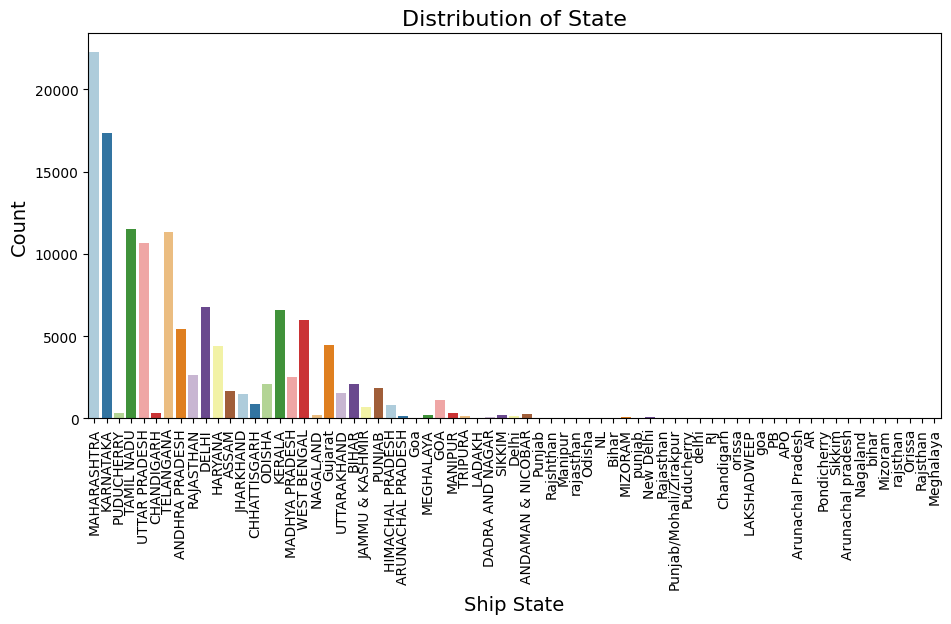

In [28]:
#from where we are getting more orders

plt.figure(figsize=(11, 5))
sns.countplot(data=df, x='ship-state', palette="Paired")

plt.xlabel('Ship State', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.title('Distribution of State', fontsize=16)

plt.xticks(rotation=90)

plt.show()


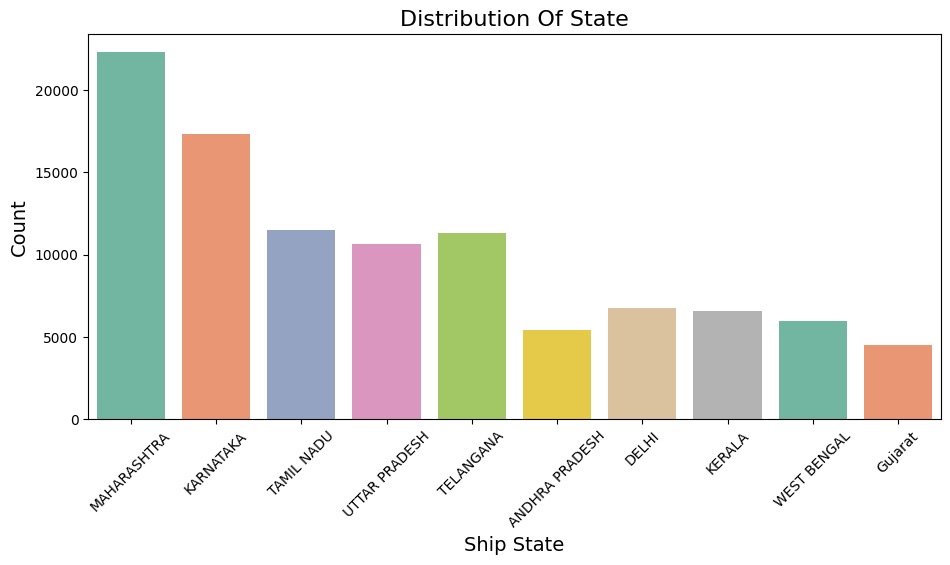

In [29]:
# Get the top 10 most frequent states
top_10_state = df['ship-state'].value_counts().head(10)

plt.figure(figsize=(11, 5))
sns.countplot(data=df[df['ship-state'].isin(top_10_state.index)], x='ship-state', palette='Set2')

plt.xlabel('Ship State', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.title('Distribution Of State', fontsize=16)

plt.xticks(rotation=45)

plt.show()

Observation: From above Graph you can see that most of the buyers are Maharashtra state .

Conclusion :

The data analysis reveals that the business has a significant customer base in Maharashtra state, mainly serves retailers experiences high demand for T-shirts, and sees M-Size as the preferred choice among buyers.